# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units = "metric"
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append ({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | guerrero negro
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | newman
Processing Record 5 of Set 1 | anadyr
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | hawaiian paradise park
Processing Record 8 of Set 1 | klaksvik
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | saldanha
Processing Record 12 of Set 1 | lihue
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | zheleznodorozhnyy
Processing Record 17 of Set 1 | beitbridge
Processing Record 18 of Set 1 | porbandar
Processing Record 19 of Set 1 | wailua homesteads
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | holualoa
Process

Processing Record 36 of Set 4 | filiatra
Processing Record 37 of Set 4 | boiling springs
Processing Record 38 of Set 4 | vinhais
Processing Record 39 of Set 4 | rio grande
Processing Record 40 of Set 4 | praya
Processing Record 41 of Set 4 | kingston
Processing Record 42 of Set 4 | pangkalanbuun
Processing Record 43 of Set 4 | vila velha
Processing Record 44 of Set 4 | black point
Processing Record 45 of Set 4 | natal
Processing Record 46 of Set 4 | ta`u
Processing Record 47 of Set 4 | whitehorse
Processing Record 48 of Set 4 | reggane
Processing Record 49 of Set 4 | sakata
Processing Record 0 of Set 5 | santana do livramento
Processing Record 1 of Set 5 | haiku-pauwela
Processing Record 2 of Set 5 | parkes
Processing Record 3 of Set 5 | sao tome
Processing Record 4 of Set 5 | parvatsar
Processing Record 5 of Set 5 | concordia
Processing Record 6 of Set 5 | naze
Processing Record 7 of Set 5 | port glaud
City not found. Skipping...
Processing Record 8 of Set 5 | totness
Processing Recor

Processing Record 25 of Set 8 | melfort
Processing Record 26 of Set 8 | spas-demensk
Processing Record 27 of Set 8 | arica
Processing Record 28 of Set 8 | quellon
Processing Record 29 of Set 8 | fortuna
Processing Record 30 of Set 8 | mil'kovo
Processing Record 31 of Set 8 | lycksele
Processing Record 32 of Set 8 | camana
Processing Record 33 of Set 8 | sittwe
Processing Record 34 of Set 8 | salinopolis
Processing Record 35 of Set 8 | sal rei
Processing Record 36 of Set 8 | kudat
Processing Record 37 of Set 8 | puerto plata
Processing Record 38 of Set 8 | manggar
Processing Record 39 of Set 8 | lamu
Processing Record 40 of Set 8 | tual
Processing Record 41 of Set 8 | la gi
Processing Record 42 of Set 8 | kapa'a
Processing Record 43 of Set 8 | isangel
Processing Record 44 of Set 8 | novyy urgal
Processing Record 45 of Set 8 | podgornoye
Processing Record 46 of Set 8 | sahy
Processing Record 47 of Set 8 | sao jose da coroa grande
Processing Record 48 of Set 8 | mount pearl
Processing Rec

Processing Record 16 of Set 12 | gornopravdinsk
Processing Record 17 of Set 12 | nishinoomote
Processing Record 18 of Set 12 | zarzis
Processing Record 19 of Set 12 | manuel ojinaga
City not found. Skipping...
Processing Record 20 of Set 12 | felipe carrillo puerto
Processing Record 21 of Set 12 | nova kakhovka
Processing Record 22 of Set 12 | valle de la pascua
Processing Record 23 of Set 12 | mikun'
Processing Record 24 of Set 12 | krasnyy chikoy
Processing Record 25 of Set 12 | brookings
Processing Record 26 of Set 12 | benguela
Processing Record 27 of Set 12 | gualeguay
Processing Record 28 of Set 12 | carsamba
Processing Record 29 of Set 12 | dera bugti
Processing Record 30 of Set 12 | bubaque
Processing Record 31 of Set 12 | vorkuta
Processing Record 32 of Set 12 | mabaruma
Processing Record 33 of Set 12 | umarkhed
Processing Record 34 of Set 12 | tinogasta
Processing Record 35 of Set 12 | baiyin
Processing Record 36 of Set 12 | yung shue wan
Processing Record 37 of Set 12 | kovd

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [23]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,guerrero negro,27.9769,-114.0611,26.09,24,88,1.82,MX,1702938288
1,port-aux-francais,-49.3500,70.2167,7.32,95,99,17.81,TF,1702938288
2,newman,37.3138,-121.0208,16.83,69,100,4.80,US,1702938288
3,anadyr,64.7500,177.4833,-18.72,84,100,5.00,RU,1702938288
4,ilulissat,69.2167,-51.1000,-8.99,62,75,11.32,GL,1702938289


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,guerrero negro,27.9769,-114.0611,26.09,24,88,1.82,MX,1702938288
1,port-aux-francais,-49.3500,70.2167,7.32,95,99,17.81,TF,1702938288
2,newman,37.3138,-121.0208,16.83,69,100,4.80,US,1702938288
3,anadyr,64.7500,177.4833,-18.72,84,100,5.00,RU,1702938288
4,ilulissat,69.2167,-51.1000,-8.99,62,75,11.32,GL,1702938289


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

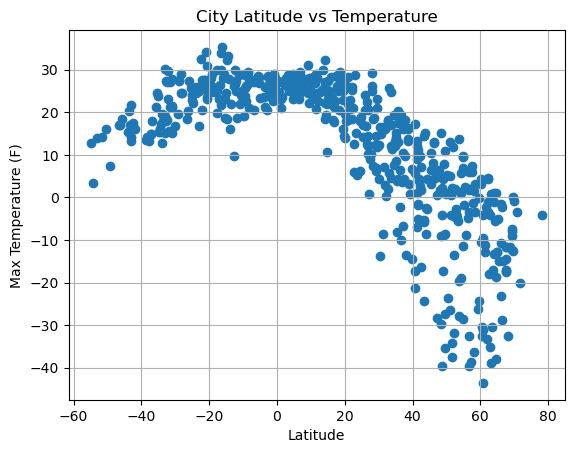

In [26]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

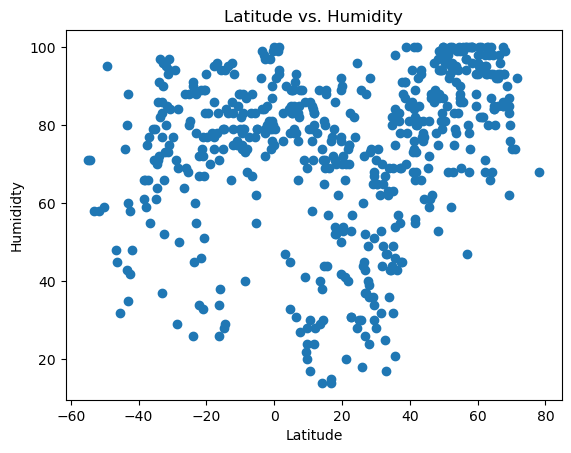

In [27]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])
# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humididty")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

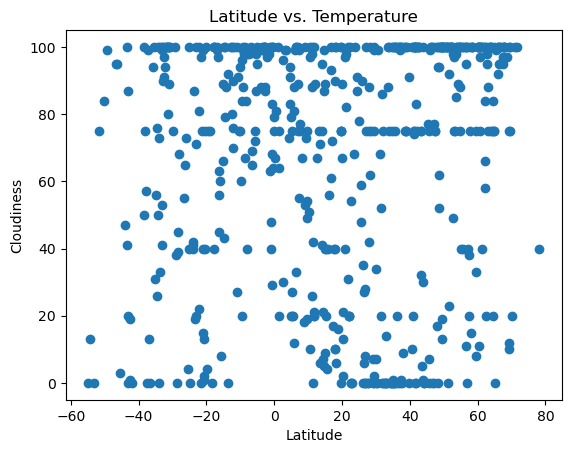

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

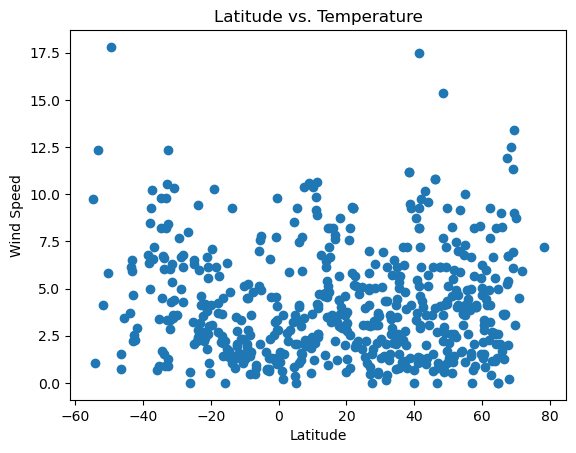

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
def lineregress(x,y):
    slope, intercept, rvalue, p_value, std_err =linregress(x, y)   
    plt.plot(x, [intercept + slope*val for val in x], 'r')
    print(f"The r-value is: {rvalue}")

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = city_data_df.loc[city_data_df["Lat"]>= 0]

# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,guerrero negro,27.9769,-114.0611,26.09,24,88,1.82,MX,1702938288
2,newman,37.3138,-121.0208,16.83,69,100,4.80,US,1702938288
3,anadyr,64.7500,177.4833,-18.72,84,100,5.00,RU,1702938288
4,ilulissat,69.2167,-51.1000,-8.99,62,75,11.32,GL,1702938289
5,hawaiian paradise park,19.5933,-154.9731,22.80,92,100,4.63,US,1702938289


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data_df.loc[city_data_df["Lat"]< 0]
# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,7.32,95,99,17.81,TF,1702938288
8,margaret river,-33.9500,115.0667,12.67,72,73,6.04,AU,1702938290
9,saldanha,-33.0117,17.9442,15.03,77,41,10.57,ZA,1702938290
11,waitangi,-43.9535,-176.5597,15.46,74,47,3.73,NZ,1702938290
12,blackmans bay,-43.0167,147.3167,14.07,88,87,4.68,AU,1702938290


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8039871954297106


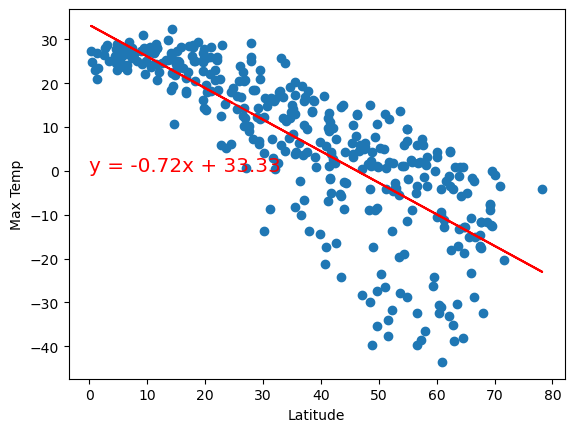

In [33]:
# Linear regression on Northern Hemisphere
lineregress(northern_df['Lat'], northern_df['Max Temp'])
slope, intercept, rvalue, p_value, std_err =linregress(northern_df['Lat'], northern_df['Max Temp'])
plt.scatter(northern_df['Lat'], northern_df['Max Temp'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)


plt.text(0, 0, s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.savefig("north_max_temp.png")

The r-value is: 0.6268348815146503


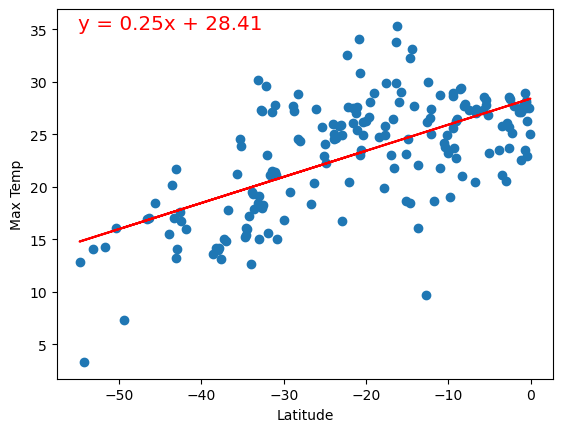

In [34]:
# Linear regression on Southern Hemisphere
lineregress(southern_df['Lat'], southern_df['Max Temp'])
slope, intercept, rvalue, p_value, std_err =linregress(southern_df['Lat'], southern_df['Max Temp'])
plt.scatter(southern_df['Lat'], southern_df['Max Temp'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)


plt.text(-55,35,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.savefig("south_max_temp.png")

**Discussion about the linear relationship:** The closer to the equator the higher the average temperature becomes. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.42847461594706193


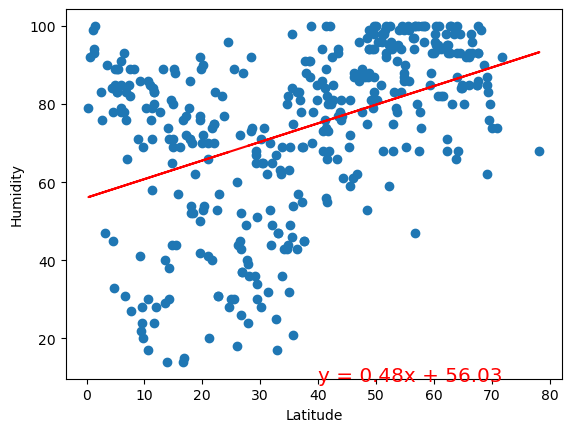

In [36]:
# Northern Hemisphere
lineregress(northern_df['Lat'], northern_df['Humidity'])
slope, intercept, rvalue, p_value, std_err =linregress(northern_df['Lat'], northern_df['Humidity'])
plt.scatter(northern_df['Lat'], northern_df['Humidity'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)


plt.text(40,9,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("north_humidity.png")

The r-value is: 0.30324752077574146


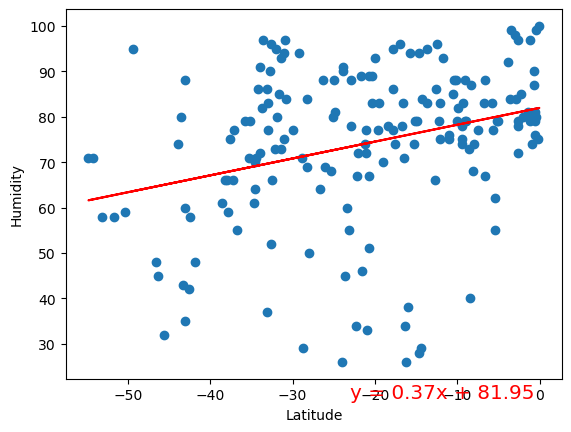

In [37]:
# Southern Hemisphere
lineregress(southern_df['Lat'], southern_df['Humidity'])
slope, intercept, rvalue, p_value, std_err =linregress(southern_df['Lat'], southern_df['Humidity'])
plt.scatter(southern_df['Lat'], southern_df['Humidity'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)


plt.text(-23,18,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("south_humidity.png")

**Discussion about the linear relationship:** In the northern hemisphere the further the latitude is from the equator there is more humidity. However in the southern hemisphere its the inverse, the closer the latitude from the equator, there is more humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.22049891101278166


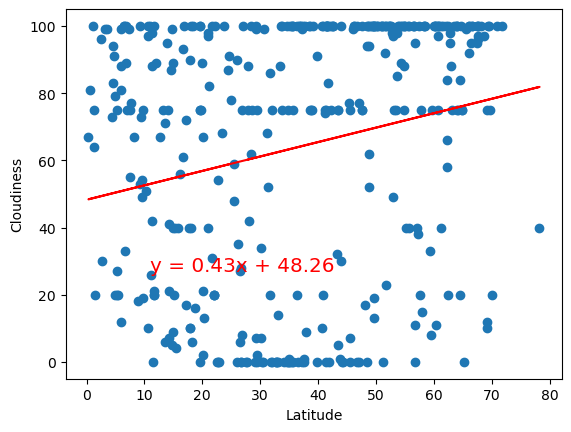

In [38]:
# Northern Hemisphere
lineregress(northern_df['Lat'], northern_df['Cloudiness'])
slope, intercept, rvalue, p_value, std_err =linregress(northern_df['Lat'], northern_df['Cloudiness'])
plt.scatter(northern_df['Lat'], northern_df['Cloudiness'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)


plt.text(11,27,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("north_cloudiness.png")

The r-value is: 0.3075850531775056


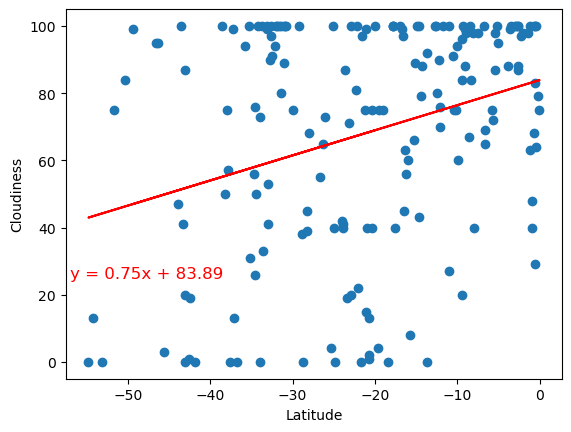

In [39]:
# Southern Hemisphere
lineregress(southern_df['Lat'], southern_df['Cloudiness'])
slope, intercept, rvalue, p_value, std_err =linregress(southern_df['Lat'], southern_df['Cloudiness'])
plt.scatter(southern_df['Lat'], southern_df['Cloudiness'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)


plt.text(-57,25,s=f"y = {slope}x + {intercept}", c='r', size='large')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("south_cloudiness.png")

**Discussion about the linear relationship:** weak or no correlation


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.09231257419386157


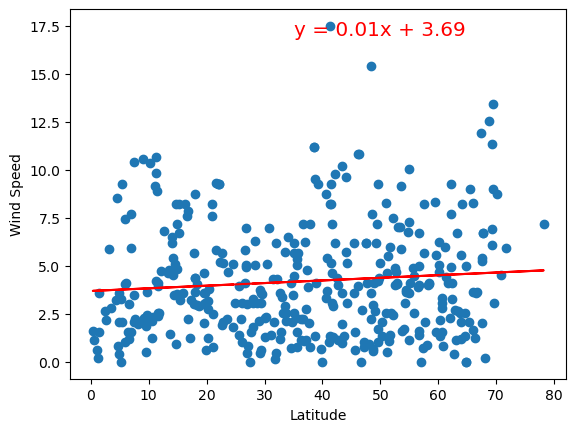

In [54]:
# Northern Hemisphere
lineregress(northern_df['Lat'], northern_df['Wind Speed'])
slope, intercept, rvalue, p_value, std_err =linregress(northern_df['Lat'], northern_df['Wind Speed'])
plt.scatter(northern_df['Lat'], northern_df['Wind Speed'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)


plt.text(35,17,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("north_wind_speed.png")

The r-value is: -0.3691161276984889


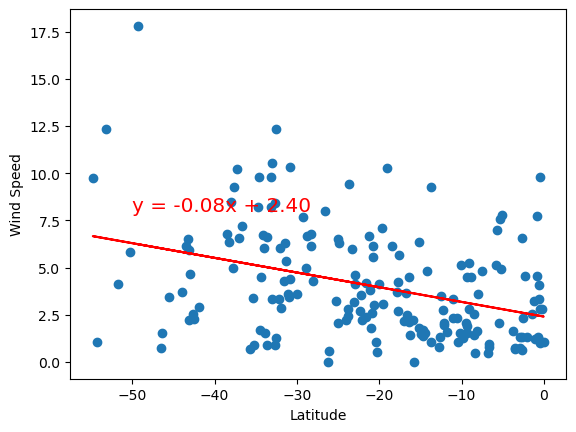

In [56]:
# Southern Hemisphere
lineregress(southern_df['Lat'], southern_df['Wind Speed'])
slope, intercept, rvalue, p_value, std_err =linregress(southern_df['Lat'], southern_df['Wind Speed'])
plt.scatter(southern_df['Lat'], southern_df['Wind Speed'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)


plt.text(-50,8,s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("south_wind_speed.png")